***My Personal Data Project***  
*Exploring my social media patterns* 

For this assignment, I wanted to better understand my historical social media usage. Using two main datasets from my Instagram - `Post_Comments.json` and `Liked_Posts.json` - I was able to gain insight into the impact social media has made on my life. 

I've had my Instagram account for almost ten years, starting in 2013. There is information about my interests, likes, dislikes, and more from age 11 to 20. How have I changed? How have I stayed the same? These are all questions I may be able to answer to. These are all questions which may be asked by data engineers at Instagram, too. My usage patterns are an important part of Instagram's profit model - It's essential to know what I like and what I interact most with in order to have an effective algorithm for distributing advertisements. By exploring my personal social media data, I would like to gain an understanding of what developers may be looking for when developing algorithms for the company. 

The data comes in `.json` files, and the two main files I focused on were mentioned above. Their data collection methods are similar: When I either liked a post or commented on one, the *title* of the account which posted the content, the *timestamp* of when I liked/commented, and the *value* of the interaction were recorded. These three attributes existed across both tables. Within `Post_Comments.json` there was also an attribute for *deletion station*, which was a boolean value noting whether or not the comment was deleted. Under `Liked_Posts.json` there was an attribute which contained the link to the post I liked. 

In [413]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

liked_posts_uncleaned = pd.read_json('liked_posts.json')
print(liked_posts_uncleaned.head())
print(liked_posts_uncleaned.head()['likes_media_likes'][0])

                                   likes_media_likes
0  {'title': 'ladyoferudite', 'media_list_data': ...
1  {'title': 'ladyoferudite', 'media_list_data': ...
2  {'title': 'someinfinites', 'media_list_data': ...
3  {'title': 'someinfinites', 'media_list_data': ...
4  {'title': 'someinfinites', 'media_list_data': ...
{'title': 'ladyoferudite', 'media_list_data': [], 'string_list_data': [{'href': 'https://www.instagram.com/p/bq3bqBinIf/', 'value': 'ð\x9f\x91\x8d', 'timestamp': 1373643417}]}


The instagram data was organized in a DataFrame as one column of over 43,000 instances. These instances were dictionaries in which lists and other dictionaries were embedded. The first step of cleaning was extracting the embedded dictionaries and restructuring each row so that there were multiple columns with no embedded list-types. 

This was accomplished using for and while loops which accumulated each dictionary, extracted the two instances in the dictionary, then appended them to a list. After following the extraction proccess a few more times, the list was ready to go back into a brand new, not confusing DataFrame. 

In [388]:
istg_liked_posts = pd.read_csv('liked_posts_instagram.csv')
n_by_title = istg_liked_posts.groupby('title')['title'].count().sort_values(ascending=False)[:15]
print(n_by_title)


title
brandymelvilleusa      797
textpostfeminist       457
ladyoferudite          433
zagmbb                 425
bellahadid             374
brit_harvey            364
smushofficial          363
fitnesssaunders        349
hoskelsa               326
fangirl_till_i_drop    319
fem.inist              304
jourdansloane          260
jenerous               239
emmachamberlain        207
cohmedy                204
Name: title, dtype: int64


The first attribute I wanted to explore was the accounts I interacted with most. Since this is accumulated data from over nine years of use, I couldn't exactly predict which accounts would be on this list. 

In order to collect this data, I grouped the DataFrame by *title*. Then, calling the `["Title"]` column, ran .count(). The output of this was a series which associated the number of instances where I liked an account's post with that account's title. The range of the 15 most interacted with accounts is [204, 797] or  593.  

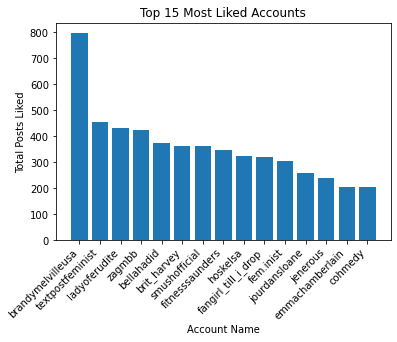

In [389]:
plt.figure() 
plt.bar(n_by_title.index.tolist(), n_by_title)

plt.xticks(rotation=45, ha="right")
plt.xlabel("Account Name")
plt.ylabel("Total Posts Liked")
plt.title("Top 15 Most Liked Accounts")

plt.show()

I was really surprised to see the variation between the like counts, primarily between the first and second bars; I was not expecting that large of a difference. For everything else, it makes sense that the difference between tiers would be smaller. One thing that is really interesting to me is that some of these accounts haven't been on my following count for years. For example, "ladyerudite" is one of the first accounts I followed on Instagram in 2013. I havent followed them since 2017 at the latest. To think they've remained in my top 15 most liked accounts all these years is astonishing. 

The next attribute I wanted to explore was the like count by year; My phone or internet usage has never been something I've payed attention to, but I stay moderately aware of my weekly screentime to make sure there are no drastic changes. So I can somewhat confidently say that this is not indicative of my overall screentime but a look into how I use that time. 

In [390]:
n_by_year = istg_liked_posts.groupby('year')['year'].count().sort_values(ascending=False)
print(n_by_year)

year
2020    8458
2021    6236
2022    5434
2019    5419
2013    5111
2016    5074
2017    2955
2014    2391
2018    1747
2015     870
Name: year, dtype: int64


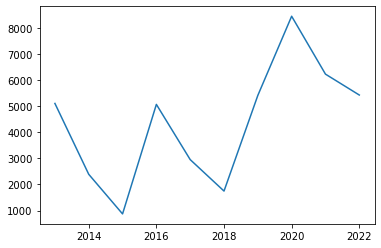

In [391]:
plt.figure() 
x = n_by_year.sort_index().index.tolist()
y = n_by_year.sort_index()
plt.plot(x,y)
plt.show()

For my hypothesis test, I wanted to look into the time I spent on Instagram year-by-year. Because of the pandemic, it wasn't a surprise that I liked the most posts in 2020. I wanted to see if this was a statistically significant difference when compared to the number of posts I liked in 2021. Granted, this was still in the depths of the pandemic, but much of that year I was physically in school or at work. 

hypothesis test: is there a statistically significant difference between how many posts I liked in 2020 versus 2021? 

alpha = 0.05

H0 = there is no significant difference 
H1 = there is a significant difference 

In [414]:
from scipy import stats 

alpha = 0.05 
sample_2020 = n_by_year[2020]
sample_2021 = n_by_year[2021]


tcomp, pval = stats.ttest_ind(sample_2020, sample_2021)

if pval/2 < alpha: 
    print("reject null hypothesis")
else: 
    print("accept null hypothesis")


accept null hypothesis


c:\Users\kenzi\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3723: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\kenzi\anaconda3\lib\site-packages\numpy\core\_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


The hypothesis test results were pretty shocking to me - there's a difference of around 2,000 posts between 2020 and 2021. To learn that this was not a significant difference was pretty appalling. Now, this may be a bad thing since I definitely should not have spent a similar amount of time on that app in 2021.

This next attribute revealed some rather concerning trends in usage; Looking at the like count by hour, I am proud to say I'm not on my phone much when I've historically been in class. However, the amount of likes that accumulated in hours where I should be sleeping is really shocking. 

I looked at this data the same way I have the other attributes - grouping the DataFrame by the desired column and then calling `.count()` on that column. In the future, I would like to further break down this analysis by year, as I think more meaningful insight could be gathered from that. However, that was something I wasn't entirely sure how to do. 

In [393]:
n_by_hour = istg_liked_posts.groupby('hour')['hour'].count().sort_index()
print(n_by_hour)

hour
0     3040
1     2981
2     2866
3     2673
4     2500
5     1770
6     1044
7      555
8      274
9      126
10      66
11      30
12      86
13     981
14    1332
15    1054
16    1714
17    2151
18    3057
19    3215
20    2856
21    3009
22    3215
23    3100
Name: hour, dtype: int64


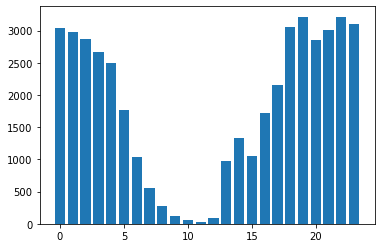

In [394]:
plt.figure() 
plt.bar(x=n_by_hour.index.tolist(), height=n_by_hour)
plt.show()

In [395]:
liked_posts = pd.read_csv('liked_posts_timestamp.csv')
del liked_posts['Unnamed: 0']
del liked_posts['hour']
del liked_posts['year']
print(liked_posts)

                        title    time  type
0               ladyoferudite  153657  like
1               ladyoferudite   41854  like
2               someinfinites   34309  like
3               someinfinites   34238  like
4               someinfinites   34231  like
...                       ...     ...   ...
43690              joe.waskom  190623  like
43691             allegrashaw  181109  like
43692          maybell.eequay  164254  like
43693  nicolaannepeltzbeckham  105242  like
43694          gracelansberry  105137  like

[43695 rows x 3 columns]


In [396]:
post_comments = pd.read_csv('post_comments_instagram.csv')
del post_comments['Unnamed: 0']
del post_comments['year']
print(post_comments)

                 title    time     type
0              afraw22  233334  comment
1            jennaseri   41405  comment
2       rachel.sands27   40429  comment
3               u.m.ok   41822  comment
4               u.m.ok   41813  comment
..                 ...     ...      ...
687         ikisspayne   35911  comment
688   theresacarstairs  155134  comment
689  samonstage_lyrics  213324  comment
690  justgirlythingsxx   41400  comment
691    fashionseternal   22533  comment

[692 rows x 3 columns]


For my kNN and decision tree analysis, I wanted to see if there was a pattern regarding which time of day I either like or comment on a post. That is, if given a time of day, would it be possible to predict whether an interaction would be a like or a comment? I wanted to understand this simply because there is so much information on my instagram usage that, if it's possible, I definitely have enough information to do so. I also think this would be an interesting correlation to investigate because it may be a behavior companies which utilize social media would want to understand. Posting at a time which optimizes interactions is incredibly important. A tool which predicts when the best time to post is could help a lot of companies. 

In [397]:
instagram_data_by_time = pd.merge(post_comments, liked_posts, on='time', how='outer', indicator=True)

type = [] 
for item in instagram_data_by_time['_merge']:
    if item == 'left_only': 
        type.append('comment')
    elif item == 'right_only': 
        type.append('like')
    else: 
        type.append('both')

instagram_data_by_time['type'] = type
del instagram_data_by_time['type_x']
del instagram_data_by_time['type_y']
del instagram_data_by_time['_merge']


In [400]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
scaler = MinMaxScaler()

X = instagram_data_by_time.drop(['type', 'title_x', 'title_y'], axis=1)
X = scaler.fit_transform(X)
y = instagram_data_by_time['type']
print(X.shape, y.shape)


(44028, 1) (44028,)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y)


In [ ]:
scaler.fit(X_train)
X_train_normalized = scaler.transform(X_train)
print(X_train_normalized)
X_test_normalized = scaler.transform(X_test)
print(X_test_normalized)

[[0.93457282]
 [0.05734519]
 [0.59638832]
 ...
 [0.94768538]
 [0.06486351]
 [0.01585458]]
[[0.78200265]
 [0.0934789 ]
 [0.85834707]
 ...
 [0.86769623]
 [0.85573643]
 [0.61371352]]


In [ ]:
knn_clf = KNeighborsClassifier(n_neighbors=3, metric="euclidean")
knn_clf.fit(X_train_normalized,  y_train) 
y_predicted = knn_clf.predict(X_test_normalized) 

knn_clf.fit(X_train, y_train)
acc = knn_clf.score(X_test, y_test)
print("accuracy:", acc)

accuracy: 0.9788316525847188


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

tree_clf = DecisionTreeClassifier(random_state=0)
tree_clf.fit(X_train, y_train)
acc = tree_clf.score(X_test, y_test)
print("accuracy:", acc)


accuracy: 0.9736531298264741


In [ ]:
print(len(y_predicted))

comment_count_test = 0
like_count_test = 0
both_count_test = 0

for value in y_predicted:
    if value == 'like':
        like_count_test += 1
    elif value == 'comment':
        comment_count_test += 1
    else: 
        both_count_test += 1

print(like_count_test, comment_count_test, both_count_test)
print(like_count_test/len(y_predicted)*100, comment_count_test/len(y_predicted)*100, both_count_test/len(y_predicted)*100)


11007
10946 1 60
99.44580721359135 0.009085127646043427 0.5451076587626056


I think this accuracy is a little too high. I looked at the distribution of instances across the testing set and it made sense that the accuracy would be so high without actually being true. The training set has significantly more instances of a post being liked than commented on - let alone both. For the most part, if it spit out 'like' as the predicted value every time, only 61 instances would be missed. In a test set of 11007, that's 0.55%. I just don't think these are classifications which I'm able to examine in a way that's actually insightful. The sheer size of the test set, which I thought would be an asset, may have hurt the results more than most else. 

If I were to do this again, I would look at the title of the poster and then run a test set of multiple accounts, seeing whether or not I would interact with the account based on the title. Looking at timing may have also been a bit too complicated. I examined attributes which were a bit too complex for my current skills and understanding. 